# To measure the rate of deposition of MeOH

largely based on this article by *Westly et al.*

https://pubs.aip.org/aip/jcp/article/108/8/3321/182292/Density-and-index-of-refraction-of-water-ice-films

where they provide the following diagram:

![westly_Fig1](images/Westly_Fig1.png)



In [2]:
from IPython.display import Image
from IPython.display import HTML, Markdown
import math
import numpy, pandas 
import matplotlib.pyplot as plt
import openpyxl
import xlrd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import os
from scipy import __version__
from os.path import join
from os import listdir
from collections import defaultdict
from matplotlib.ticker import FormatStrFormatter
import scipy.constants as constants
from sys import float_info

print('finished import')

finished import


In [4]:
#shortcut to get back to the right directory
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

C:\Users\au302163\Fit_VUV_Spont MeOH
C:\Users\au302163


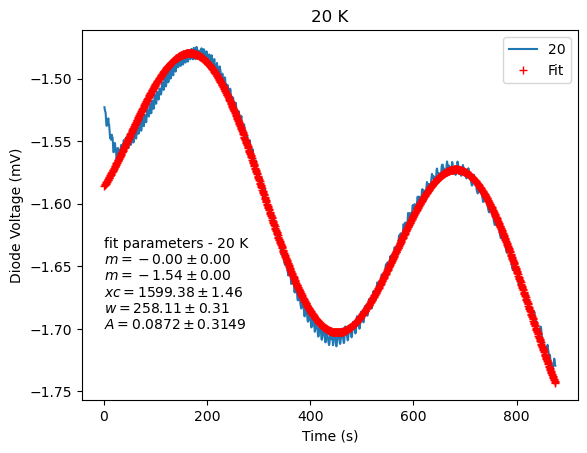

chi-squared = -5.372560938377355
Refractive index = 0.893 +- 0.631 at 632.8 nm

theta2 = 0.23685473211089747 rad 
theta2 = 13.570776507656161 degrees

d = 364.66096135221323 nm +-  0.630888022536117

Deposition rate = 0.7064100445588687  +/-  0.6321081068580364 nm/s

Thickness = 618.288217140328 nm


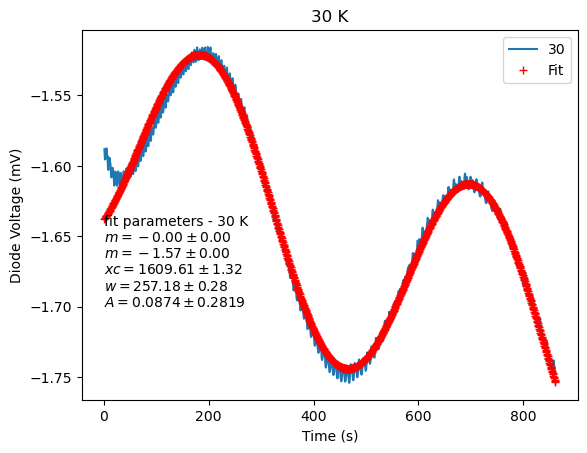

chi-squared = -5.02566510215999
Refractive index = 0.895 +- 0.565 at 632.8 nm

theta2 = 0.23624345990255644 rad 
theta2 = 13.535753189984579 degrees

d = 363.68385068953177 nm +-  0.5646928742109334

Deposition rate = 0.7070502065559828  +/-  0.5657888839001353 nm/s

Thickness = 609.3047578008575 nm


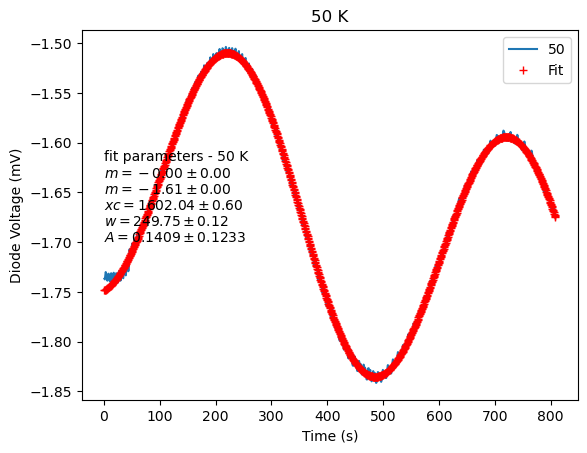

chi-squared = -11.210602507113197
Refractive index = 0.839 +- 0.247 at 632.8 nm

theta2 = 0.2522088231271711 rad 
theta2 = 14.450501121148372 degrees

d = 389.3011534133895 nm +-  0.24723746939564076

Deposition rate = 0.7793886389063581  +/-  0.24773130086097206 nm/s

Thickness = 630.1364939444294 nm


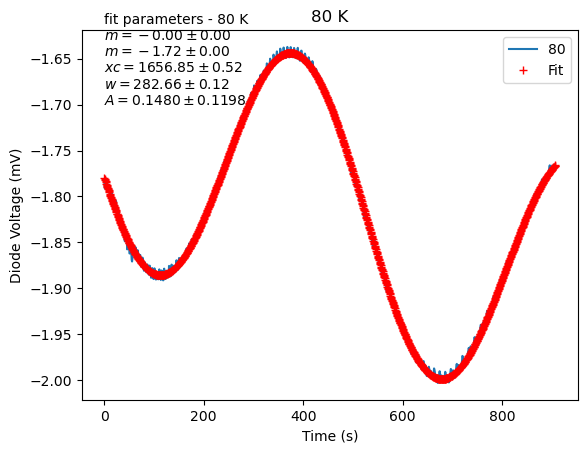

chi-squared = -13.966656820489572
Refractive index = 0.841 +- 0.240 at 632.8 nm

theta2 = 0.251626743542742 rad 
theta2 = 14.417150417619856 degrees

d = 388.3635520341744 nm +-  0.24011614510923165

Deposition rate = 0.6869725454179325  +/-  0.24054000475318665 nm/s

Thickness = 622.9171643655282 nm


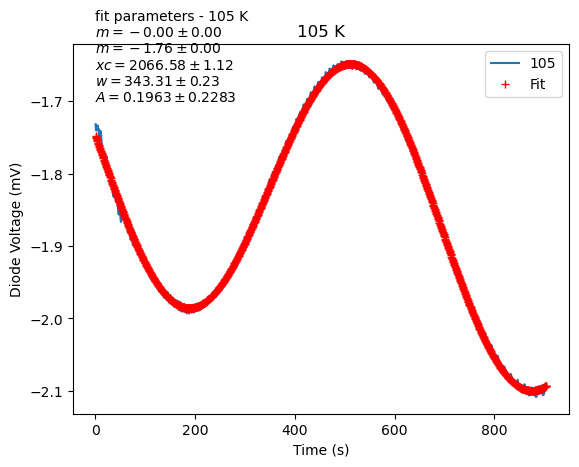

chi-squared = -29.276132404526813
Refractive index = 0.799 +- 0.457 at 632.8 nm

theta2 = 0.2651612285795009 rad 
theta2 = 15.192619288109107 degrees

d = 410.23879521478773 nm +-  0.4573687858414366

Deposition rate = 0.5974834807927122  +/-  0.4580338341083687 nm/s

Thickness = 540.4345630796624 nm


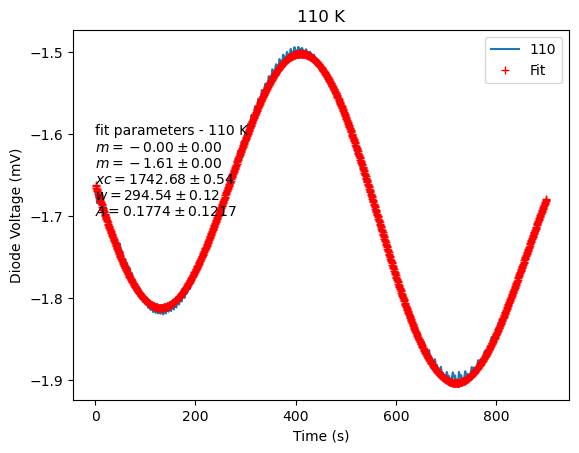

chi-squared = -22.444356630588377
Refractive index = 0.802 +- 0.244 at 632.8 nm

theta2 = 0.2642041466471792 rad 
theta2 = 15.13778253273885 degrees

d = 408.6867141968998 nm +-  0.24392979253476968

Deposition rate = 0.6937597367801842  +/-  0.244342870705463 nm/s

Thickness = 624.3844568619025 nm


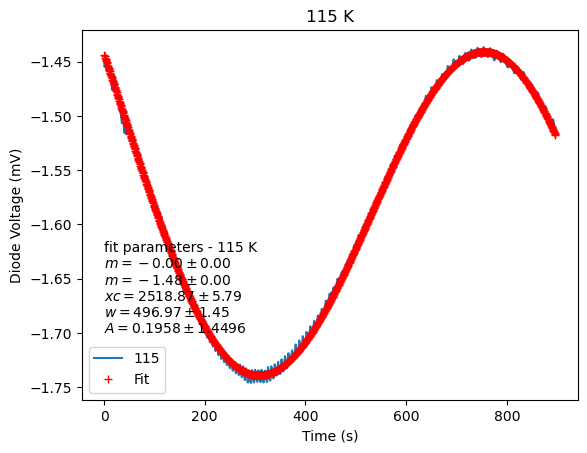

chi-squared = -27.781831026591888
Refractive index = 0.767 +- 2.903 at 632.8 nm

theta2 = 0.27657201280324567 rad 
theta2 = 15.846409065064146 degrees

d = 428.8065853614471 nm +-  2.9034475530612225

Deposition rate = 0.43141775343205924  +/-  2.9063643137873667 nm/s

Thickness = 386.6642013620311 nm


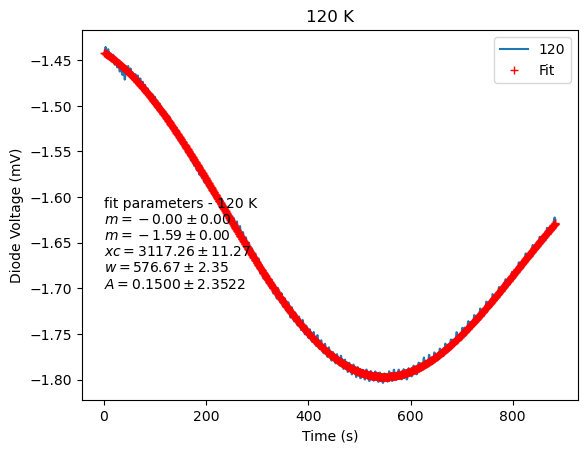

chi-squared = -19.0920384732383
Refractive index = 0.827 +- 4.706 at 632.8 nm

theta2 = 0.25602227649162035 rad 
theta2 = 14.66899590430128 degrees

d = 395.4507765715249 nm +-  4.7055945685484195

Deposition rate = 0.3428741538567596  +/-  4.709673488828664 nm/s

Thickness = 302.9310293032164 nm
   Temperature    y0 / c           xc           w         A  refractive index  \
0           20 -1.535575  1599.375210  258.108562  0.087161          0.892575   
1           30 -1.574665  1609.612453  257.183894  0.087390          0.894841   
2           50 -1.612897  1602.044639  249.747773  0.140928          0.839291   
3           80 -1.715978  1656.846706  282.663081  0.148009          0.841191   
4          105 -1.758772  2066.583010  343.305554  0.196299          0.799190   
5          110 -1.614711  1742.677048  294.544849  0.177405          0.802017   
6          115 -1.484844  2518.874472  496.973736  0.195784          0.767010   
7          120 -1.585132  3117.257984  576.670437  0.1

In [3]:
export_path='data/exports'
path = 'data/raw_interferometer'
column_names = ['Time/s','Ch0/V','Ch0/volts','Ch2/volts','Ch3/volts','Z_Motor','Beam_current','temperature','Absorbance']
dosing_rate = np.array([])
all_temp = np.array([]) 
amplitudes =np.array([])
fit_results = pd.DataFrame(columns=['Temperature', 'y0 / c', 'xc', 'w', 'A', 'refractive index', 'err_refractive','thickness','dep_rate', 'err_dep_rate'])

#def pies (x,y0,xc,w,A): #use this if the background is flat
def pies (x,m,c,xc,w,A): #use this if the background is a linear slope, i.e., if the peak maxima decrease in intensity with time.
    #y0 = p[0]
    #xc = p[1]
    #w  = p[2]
    #A  = p[3]
    #return y0+A*np.sin(np.pi*(x-xc)/w)
    return (m*x+c)+A*np.sin(np.pi*(x-xc)/w)

#guess = [-2,-2000,250,0.10] # first estimate of variable values 
guess = [-2,-2,2000,350,0.5]
filenames_string_long = listdir(path)

filenames_not_sorted = [int(name.replace('K.txt', '')) for name in filenames_string_long]
filenames=sorted(filenames_not_sorted )


for file in filenames:
    
    all_temp = np.append(all_temp,file)
    file_string=str(file)+'K.txt'
    data_all = pd.read_csv(join(path, file_string), header = [2] , delimiter = r"\s+")
    data_all.columns = column_names
    data = data_all.iloc[:-67]
    popt, pcov = curve_fit(pies, data['Time/s'], data['Ch2/volts'], p0=guess, maxfev=20000)
    perr_pies = np.sqrt(np.diag(pcov))
    
    #y0, xc, w, A = popt
    m = popt[0]
    c = popt[1]
    xc = popt[2]
    w = popt[3]    
    A=popt[4]
    A=abs(A)
    
    err_m = perr_pies [0]
    err_c= perr_pies [1]
    err_xc = perr_pies [2]
    err_w= perr_pies [3]
    err_A= perr_pies [3]
    
   

    #y=y0+A*np.sin(2*np.pi*(data['Time/s']-xc)/w) ##use this if the background is flat
    y=(m*data['Time/s']+c)+A*np.sin(2*np.pi*(data['Time/s']-xc)/w) #use this if the background is a linear slope, i.e., if the peak maxima decrease in intensity with time.
    
    string = 'fit parameters - '+str(file)+' K'
    string+= f"\n$m = {m:.2f} \pm {err_m:.2f}$"
    string+= f"\n$m = {c:.2f} \pm {err_c:.2f}$"
    #string+= f"\n$m = {y0:.2f} \pm {err_y0:.2f}$" #use this if the bkgd is flat
    string+= f"\n$xc = {xc:.2f} \pm {err_xc:.2f}$"
    string+= f"\n$w = {w:.2f} \pm {err_w:.2f}$"
    string+= f"\n$A = {A:.4f} \pm {err_A:.4f}$"
    
    annotate=(string)

    plt.plot(data['Time/s'],data['Ch2/volts'],'-',label=file)
    plt.plot(data['Time/s'], pies(data['Time/s'],*popt),'r+', label='Fit')       
    plt.xlabel('Time (s)')
    plt.ylabel(r'Diode Voltage (mV)')
    plt.title(str(file)+' K')
    plt.text(0,-1.7,annotate)
    plt.legend()
    plt.show()    
    
    chi_squared = np.sum(((data['Ch2/volts']-y)**2)/y)
    print ("chi-squared =",chi_squared)

    #print("\ny0 =", popt[0], "\nxc =", popt[1], "\nw =", popt[2], "\nA =", popt[3])
    amplitudes=np.append(amplitudes, A)

    n2=(c+A)/(c-A)
    err_n2 = err_c*2+err_A*2

    n2_string = f"Refractive index = {n2:.3f} +- {err_n2:.3f} at 632.8 nm"
    print(n2_string)

    #n2=1.26
    #theta is the angle between the substrate and the incident beam
    theta=np.radians(12)

    theta2=np.arcsin(theta/n2)
    theta2_deg=np.rad2deg(theta2)
    
    print ("\ntheta2 =", theta2, "rad \ntheta2 =", theta2_deg, "degrees")

    d=632.8/(2*n2*np.cos(theta2))
    err_d=err_n2
    print ("\nd =", d, "nm +- ",err_d)

    rate=d/(2*w)
    err_rate = err_d+err_w/w
    
    dosing_rate=np.append(dosing_rate,rate)

    print ("\nDeposition rate =", rate, " +/- ", err_rate, "nm/s")
    t=15
    thickness=rate*max(data['Time/s'])

    print ("\nThickness =", thickness, "nm")
    newdata={'Temperature':file,
             'y0 / c': c,#y0,
             'xc': xc,
              'w': w,
              'A': A,
             'refractive index': n2,
             'err_refractive': err_n2,
             'thickness':thickness,
             'dep_rate':rate,
                'err_dep_rate':err_rate}
    fit_results.loc[len(fit_results)] = newdata

#plt.show()    
print(fit_results)


Text(0, 0.5, 'refractive index')

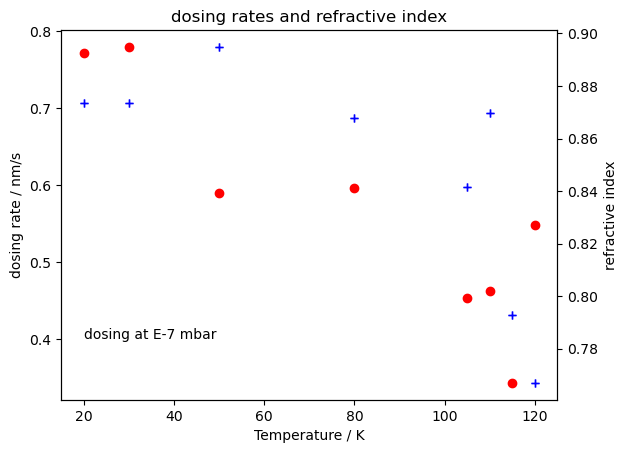

In [4]:
fig, ax1 = plt.subplots()
plt.title('dosing rates and refractive index')
plt.xlabel('Temperature / K')
plt.text(20,.4,'dosing at E-7 mbar')


ax1.plot(all_temp,dosing_rate,'b+')
ax1.errorbar(fit_results['Temperature'], fit_results['dep_rate'], yerr=None, xerr = None , fmt='b+', label='Dep Rate')
ax1.set_ylabel('dosing rate / nm/s')


ax2 = ax1.twinx()
ax2.errorbar(fit_results['Temperature'], fit_results['refractive index'], yerr=None, xerr = None , fmt='ro', label='Refractive Index')
ax2.set_ylabel('refractive index')

